<center><img src="https://devskrol.com/wp-content/uploads/2020/07/RandomForest.jpg" alt="Random Forest"/></center>


In this lab we will investigate the use of classification and regression trees as well as random forest. We will work with the [Spam dataset](https://archive.ics.uci.edu/ml/datasets/spambase) available from the UCI website and the [Boston data set](https://www.openml.org/search?type=data&status=active&id=531)

Make sure you get a sense of both datasets. In particular, answer the following questions:
+ What is the response?
+ What are the covariates?
+ How would you prepare data for a classification/regression task (if needed)?

In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd

Although you may need to install 'ucimlrepo' first (pip install ucimlrepo), retrieving the spam dataset is straightforward. Just invoke the following piece of code

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 

For the Boston data set (the function load_boston doesn't work anymore), you should invoke

In [6]:
from sklearn.datasets import fetch_openml
Boston = fetch_openml(data_id=531)

> Fit a CART model using the [tree.DecisionTreeClassifier()](http://scikit-learn.org/stable/modules/tree.html#classification) function.

In [23]:
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
X.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [21]:
y.head(5)

,Class
0,1
1,1
2,1
3,1
4,1


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
performance=[]
train_performance=[]
for i in range(3,400,10):
    
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    # Évaluation de la performance du modèle decision_tree
    y_train_pred = dt.predict(X_train)    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    predictions = dt.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    performance.append(accuracy)
    train_performance.append(train_accuracy)
    
    #print("accuracy du modèle :", accuracy)

    # Calcul de la matrice de confusion pour le modèle decision_tree
    #matrice_confusion = confusion_matrix(y_test, predictions)
    #print("Matrice de confusion :")
    #print(matrice_confusion)


> Compare the model's performance as the maximum number of terminal nodes varies.

> Plot the classification rate error as the number of terminal nodes varies and comment.

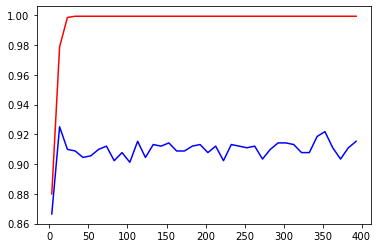

In [49]:
## Insert code
## Insert code
plt.plot(range(3,400,10),performance,  "blue")
plt.plot(range(3,400,10),train_performance, "red")
plt.show()   

Give your comment here.

> Give a graphical representation of one of the above CART. You may want to have a look at this [link](http://scikit-learn.org/stable/modules/tree.html#classification)).

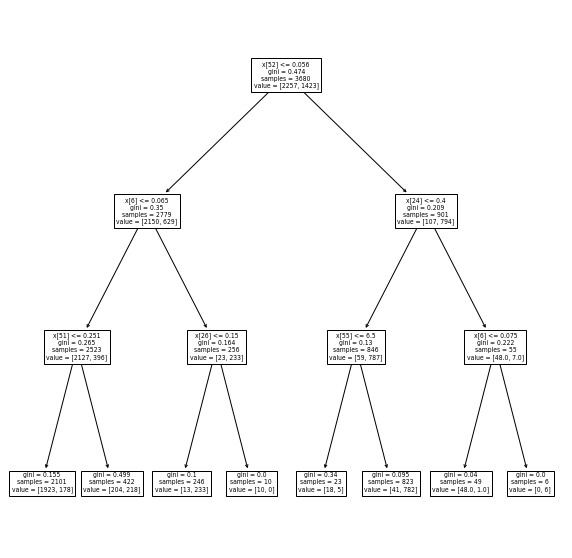

In [65]:
## Insert code
from sklearn import tree
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

plt.figure(figsize=(10, 10))
tree.plot_tree(dt)
plt.show()

We will now work with random forest on a regression task with the [Boston data set](https://scikit-learn.org/0.19/modules/generated/sklearn.datasets.load_boston.html). Import the data.

In [55]:
## insert code
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [60]:
# Créer un DataFrame à partir des données
df = pd.DataFrame(data)

# Ajouter la colonne cible
df['target'] = target


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  target  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [67]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


> Fit a random forest with 10 trees and a maximal number of covariates used for each split of 4. You may want to have a look the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)) and give predictions.

In [76]:
## insert code
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 

x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2, random_state=42 )
rf = RandomForestRegressor(n_estimators=10)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
r2_score(y_test,predictions)

0.860068131069973

> The attribute `.estimators_` stores the structure of the fitted forest. Try to retrievre predictions for each tree and from those recover the forest predictions you got in the previous question.

In [80]:
## insert code
predictions=rf.estimators_
print(predictions[5].predict(x_test))

[21.6 26.6 13.3 20.4 23.2 21.  21.7 17.8 21.7 21.2 15.6 21.7  8.7 21.4
 18.9 22.8 13.3  7.2 44.  16.7 23.1 23.1 13.2 22.  12.7 14.8 21.   8.4
 22.4 18.9 19.5 23.1 50.  24.3 13.  15.6 33.1 18.5 17.5 28.1 17.5 32.
 44.  19.3 22.  11.7 14.8 28.1 19.8 22.9 19.2 36.4 19.8 27.5 48.3 23.
 13.8 28.  22.  21.7 27.5 31.6 24.8 14.5 23.7 14.5 14.5 22.9 29.1 13.
 19.3 22.  11.8 21.7 18.5  5.6 21.4 44.  16.3 13.4 21.1  9.5 18.5 11.5
 26.4 26.6 17.8 23.1 22.9 18.  22.9  8.4 21.4 19.3 21.9 23.  50.  16.3
  8.3 16.3 22.9 28.1]


Scikit-learn uses as default accuracy score (for regression problems) the $R^2$ (coeffeicient of determination), i.e.,
$$
R^{2}=1- \frac {\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}} = 1- \frac { \frac 1n \sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{ var (Y)}, 
$$
A perfect fit gives à $R^2 = 1$ while $R^2 = 0$ corresponds to the simplest predictor (sample mean predictor). 

For a different numboer of trees in random forests, compare the out of bag scores with that computed on the test set with a varying number of trees (5 to 100). Note that retrieving the  out of bag score is done by passing `oob_score = True`. Do you understand the warnings you probably get while running your code?

C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably me

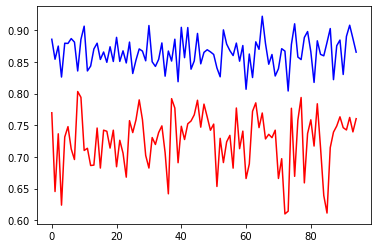

In [86]:
## insert code
R2_score=[]
Oob_score=[]
for i in range(5,100):
    rf = RandomForestRegressor(n_estimators=10, oob_score=True)
    rf.fit(x_train, y_train)
    predictions = rf.predict(x_test)
    r2=r2_score(y_test,predictions)
    oob=rf.oob_score_
    R2_score.append(r2)
    Oob_score.append(oob)
plt.plot(R2_score,  "blue")
plt.plot(Oob_score, "red")
plt.show()       

> Plot [feature importances](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_) for the random forest fitted on the Boston dataset and interpret.

[0.03983721 0.00239978 0.00848474 0.00060228 0.01433086 0.5615309
 0.01706156 0.05778813 0.0032312  0.01542865 0.01529873 0.01076091
 0.25324503]


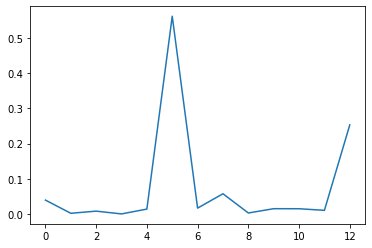

In [88]:
## Insert code
feature_importance=rf.feature_importances_
print(feature_importance)
plt.plot(feature_importance)
plt.show()       

> We now switch back to a classification task with the spam dataset. Fit a random forest classifier where the hyper parameter `max_features` is fine tuned according to the out of bag score.

In [93]:
Y=pd.DataFrame(y)

C:\Users\SYST\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SYST\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

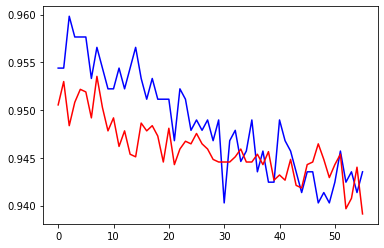

In [94]:
## insert code

X_train,X_test,y_train,y_test= train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
performance = []
Oob_score = []
for i in range(1,57):
    RF=RandomForestClassifier(max_features=i, oob_score=True)
    RF.fit(X_train, y_train)
    predictions = RF.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    performance.append(accuracy)
    oob=RF.oob_score_
    Oob_score.append(oob)
 
plt.plot(performance,  "blue")
plt.plot(Oob_score, "red")
plt.show()    
